# Analysing an Optical System 

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from meep_optics import OpticalSystem, AsphericLens, ApertureStop, ImagePlane, Sim, Analysis

Let's look at the analysis of an optical system, which is essentially made by looking at the far field beam of the system. For that, we propagate a gaussian source from the image plane to the aperture, then take the fourier transform of the squared e-field at the aperture.

We need to use a focused system, one is given here with 2 aspheric lenses with AR coating : 

In [2]:
lens1 = AsphericLens(name = 'Lens 1', 
                     r1 = 327.365, 
                     r2 = np.inf, 
                     c1 = -0.66067, 
                     c2 = 0, 
                     thick = 40, 
                     x = 130.+50., 
                     y = 0., 
                     AR_left = .5, AR_right = .5,
                     AR_delamination = 0.)
    
lens2 = AsphericLens(name = 'Lens 2', 
                     r1 = 269.190, 
                     r2 = 6398.02, 
                     c1 = -2.4029, 
                     c2 = 1770.36,
                     thick = 40, 
                     x = 40.+130.+369.408+50., 
                     y = 0.,
                     AR_left = .5, AR_right = .5,
                     AR_delamination = 0.)
    
aperture_stop = ApertureStop(name = 'Aperture Stop',
                             pos_x = 50,
                             diameter = 200,
                             thickness = 5,
                             n_refr = 1.1, 
                             conductivity = 1e7)
    
image_plane = ImagePlane(name = 'Image Plane',
                         pos_x = 50+714.704,
                         diameter = 300,
                         thickness = 2,
                         n_refr = 1.1, 
                         conductivity = 0.01)

We choose a wavelength of 2 MEEP length units, i.e. a frequency of 1/2. The PML layer is fixed to half a wavelength.

In [3]:
study_freq = 0.5
dpml = np.int(np.around(0.5*1/study_freq))

Because the assembly process is always the same, let's wrap in a single function : 

In [4]:
def system_assembly(lens1, lens2, aperture_stop, image_plane, res, dpml):
    opt_sys = OpticalSystem('test')
    opt_sys.set_size(800,300)
    opt_sys.add_component(lens1)
    opt_sys.add_component(lens2)
    opt_sys.add_component(aperture_stop)
    opt_sys.add_component(image_plane)
    #print(opt_sys.list_components())
    
    
    opt_sys.assemble_system(dpml = dpml, resolution = res)
    opt_sys.write_h5file()
    
    return opt_sys

The wavelength in the lenses of index 1.52 (which is their default index) should be of about 2/1.52 = 1.3. To get at least 8 computational cells per wavelength, we set the resolution to 7.

In [5]:
opt_sys = system_assembly(lens1, lens2, aperture_stop, image_plane, res = 7, dpml = dpml)

Initialize the sim and the analysis :

In [25]:
sim = Sim(opt_sys)
analysis = Analysis(sim)

A good check to do is that the gaussian pulse that will be sent by the source arrives just before the aperture stop, so that the process averaging the electric field over the duration of the pulse does not miss information.

-----------
Initializing structure...
read in 5615x2115x1 epsilon-input-file "epsilon_map.h5:eps"
time for choose_chunkdivision = 0.000882864 s
Working in 2D dimensions.
Computational cell is 802 x 302 x 0 with resolution 7
     block, center = (-350,125.5,0)
          size (5,51,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.21,1.21,1.21)
     block, center = (-350,-125.5,0)
          size (5,51,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.21,1.21,1.21)
     block, center = (364.704,0,0)
          size (2,300,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.21,1.21,1.21)
subpixel-averaging is 64.6256% done, 2.1895 s remaining
subpixel-averaging is 65.6042% done, 2.09732 s remaining
subpixel-averaging is 65.5106% done, 2.10622 s remaining
time for set_epsilon = 18.6546 s
time for set_conductivity = 0.72912 s
time for set_conductivity = 0.730

Meep progress: 175.2142857142857/800.0 = 21.9% done in 247.4s, 882.1s to go
on time step 2453 (time=175.214), 0.104048 s/step
Meep progress: 178.0/800.0 = 22.2% done in 251.4s, 878.6s to go
on time step 2492 (time=178), 0.104539 s/step
Meep progress: 180.78571428571428/800.0 = 22.6% done in 255.5s, 875.1s to go
on time step 2531 (time=180.786), 0.104189 s/step
Meep progress: 183.57142857142856/800.0 = 22.9% done in 259.6s, 871.7s to go
on time step 2570 (time=183.571), 0.104294 s/step
Meep progress: 186.35714285714283/800.0 = 23.3% done in 263.6s, 868.2s to go
on time step 2609 (time=186.357), 0.104445 s/step
Meep progress: 189.14285714285714/800.0 = 23.6% done in 267.7s, 864.6s to go
on time step 2648 (time=189.143), 0.104486 s/step
Meep progress: 191.92857142857142/800.0 = 24.0% done in 271.8s, 861.1s to go
on time step 2687 (time=191.929), 0.104539 s/step
Meep progress: 194.7142857142857/800.0 = 24.3% done in 275.9s, 857.6s to go
on time step 2726 (time=194.714), 0.104563 s/step
Mee

Meep progress: 357.57142857142856/800.0 = 44.7% done in 519.3s, 642.5s to go
on time step 5006 (time=357.571), 0.108386 s/step
Meep progress: 360.2142857142857/800.0 = 45.0% done in 523.3s, 638.9s to go
on time step 5043 (time=360.214), 0.108426 s/step
Meep progress: 362.85714285714283/800.0 = 45.4% done in 527.3s, 635.2s to go
on time step 5080 (time=362.857), 0.108459 s/step
Meep progress: 365.5/800.0 = 45.7% done in 531.3s, 631.6s to go
on time step 5117 (time=365.5), 0.108508 s/step
Meep progress: 368.1428571428571/800.0 = 46.0% done in 535.3s, 628.0s to go
on time step 5154 (time=368.143), 0.108634 s/step
Meep progress: 370.7857142857143/800.0 = 46.3% done in 539.4s, 624.3s to go
on time step 5191 (time=370.786), 0.108613 s/step
Meep progress: 373.4285714285714/800.0 = 46.7% done in 543.4s, 620.7s to go
on time step 5228 (time=373.429), 0.108658 s/step
Meep progress: 376.07142857142856/800.0 = 47.0% done in 547.4s, 617.1s to go
on time step 5265 (time=376.071), 0.108647 s/step
Mee

Meep progress: 534.1428571428571/800.0 = 66.8% done in 790.4s, 393.4s to go
on time step 7478 (time=534.143), 0.111931 s/step
Meep progress: 536.7142857142857/800.0 = 67.1% done in 794.5s, 389.7s to go
on time step 7514 (time=536.714), 0.111578 s/step
Meep progress: 539.2857142857142/800.0 = 67.4% done in 798.5s, 386.0s to go
on time step 7550 (time=539.286), 0.111624 s/step
Meep progress: 541.8571428571428/800.0 = 67.7% done in 802.5s, 382.3s to go
on time step 7586 (time=541.857), 0.111703 s/step
Meep progress: 544.4285714285714/800.0 = 68.1% done in 806.5s, 378.6s to go
on time step 7622 (time=544.429), 0.111765 s/step
Meep progress: 547.0/800.0 = 68.4% done in 810.6s, 374.9s to go
on time step 7658 (time=547), 0.111755 s/step
Meep progress: 549.5714285714286/800.0 = 68.7% done in 814.6s, 371.2s to go
on time step 7694 (time=549.571), 0.111818 s/step
Meep progress: 552.1428571428571/800.0 = 69.0% done in 818.6s, 367.5s to go
on time step 7730 (time=552.143), 0.111814 s/step
Meep pro

Meep progress: 707.2857142857142/800.0 = 88.4% done in 1062.1s, 139.2s to go
on time step 9902 (time=707.286), 0.106409 s/step
Meep progress: 710.0/800.0 = 88.8% done in 1066.1s, 135.1s to go
on time step 9940 (time=710), 0.106025 s/step
Meep progress: 712.7142857142857/800.0 = 89.1% done in 1070.1s, 131.1s to go
on time step 9978 (time=712.714), 0.105613 s/step
Meep progress: 715.5/800.0 = 89.4% done in 1074.3s, 126.9s to go
on time step 10017 (time=715.5), 0.105212 s/step
Meep progress: 718.2857142857142/800.0 = 89.8% done in 1078.4s, 122.7s to go
on time step 10056 (time=718.286), 0.105178 s/step
Meep progress: 721.0/800.0 = 90.1% done in 1082.4s, 118.6s to go
on time step 10094 (time=721), 0.105383 s/step
Meep progress: 723.7142857142857/800.0 = 90.5% done in 1086.4s, 114.5s to go
on time step 10132 (time=723.714), 0.105351 s/step
Meep progress: 726.4285714285714/800.0 = 90.8% done in 1090.4s, 110.4s to go
on time step 10170 (time=726.429), 0.105658 s/step
Meep progress: 729.214285

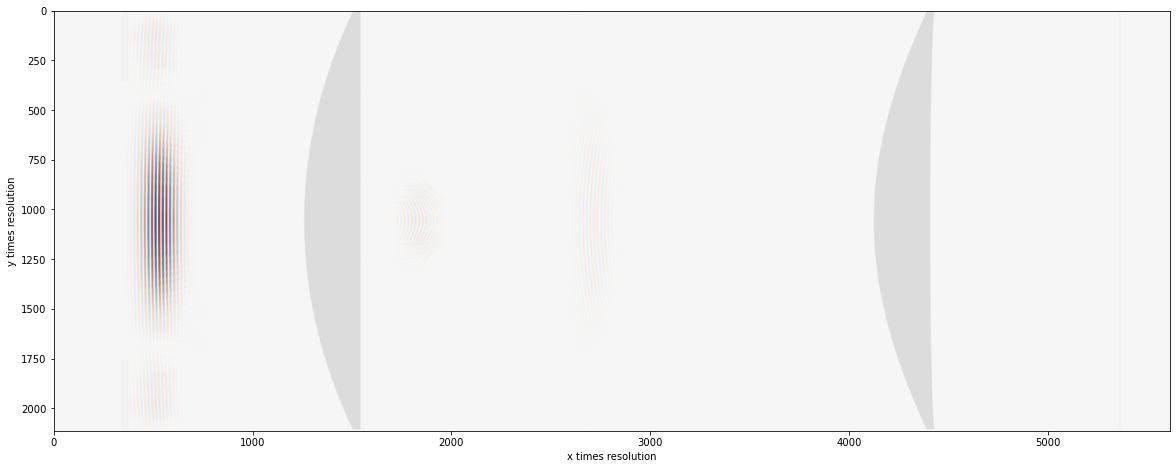

In [26]:
sim.define_source(study_freq, sourcetype = 'Gaussian beam multichromatic', 
                      x=754.704, y= 0, beam_width = 10, 
                      focus_pt_x= 0, focus_pt_y=0, size_x = 0, size_y=10,
                      fwidth = 0.1)
sim.run_sim(runtime = 800, sim_resolution = 7)
sim.plot_efield()

The beginning of the pulse is right before the aperture, this is the perfecti situation. Otherwise we would have to set a different runtime.

We can use the function to plot the averaged squared electric field : 

on time step 11200 (time=800), 3.14423 s/step
run 1 finished at t = 800.5 (11207 timesteps)
run 2 finished at t = 801.0 (11214 timesteps)
run 3 finished at t = 801.5 (11221 timesteps)
run 4 finished at t = 802.0 (11228 timesteps)
run 5 finished at t = 802.5 (11235 timesteps)
on time step 11238 (time=802.714), 0.105593 s/step
run 6 finished at t = 803.0 (11242 timesteps)
run 7 finished at t = 803.5 (11249 timesteps)
run 8 finished at t = 804.0 (11256 timesteps)
run 9 finished at t = 804.5 (11263 timesteps)
run 10 finished at t = 805.0 (11270 timesteps)
on time step 11276 (time=805.429), 0.105699 s/step
run 11 finished at t = 805.5 (11277 timesteps)
run 12 finished at t = 806.0 (11284 timesteps)
run 13 finished at t = 806.5 (11291 timesteps)
run 14 finished at t = 807.0 (11298 timesteps)
run 15 finished at t = 807.5 (11305 timesteps)
run 16 finished at t = 808.0 (11312 timesteps)
on time step 11314 (time=808.143), 0.10584 s/step
run 17 finished at t = 808.5 (11319 timesteps)
run 18 finis

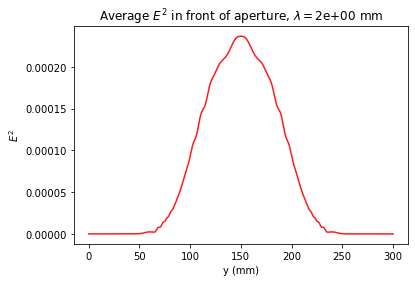

In [27]:
av_Efield = sim.plot_beam(aper_pos_x = 10)

We can check that the gaussian pulse has just passed through the aperture : 

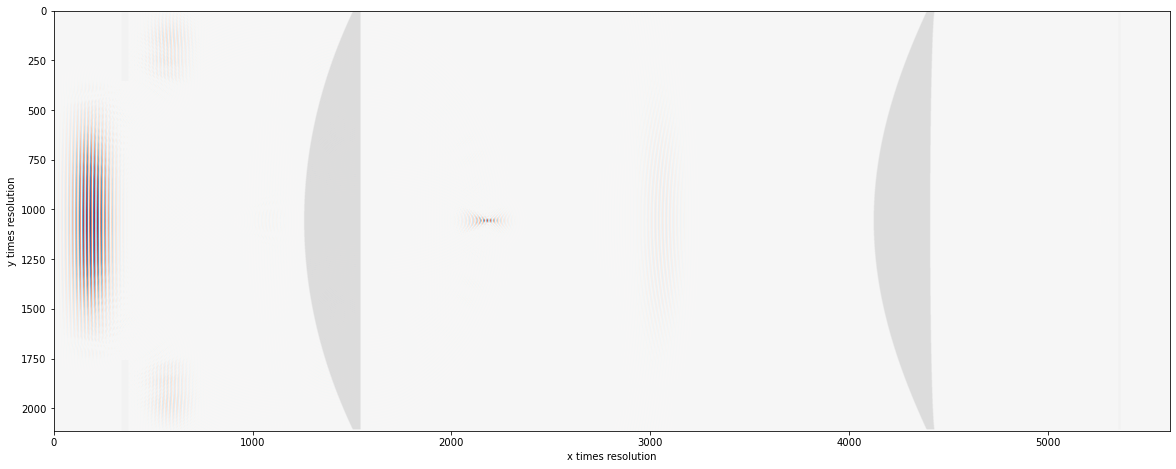

In [28]:
sim.plot_efield()

It has, this means that the averaging has properly been done.

Let's quickly look at the FT of the averaged field :

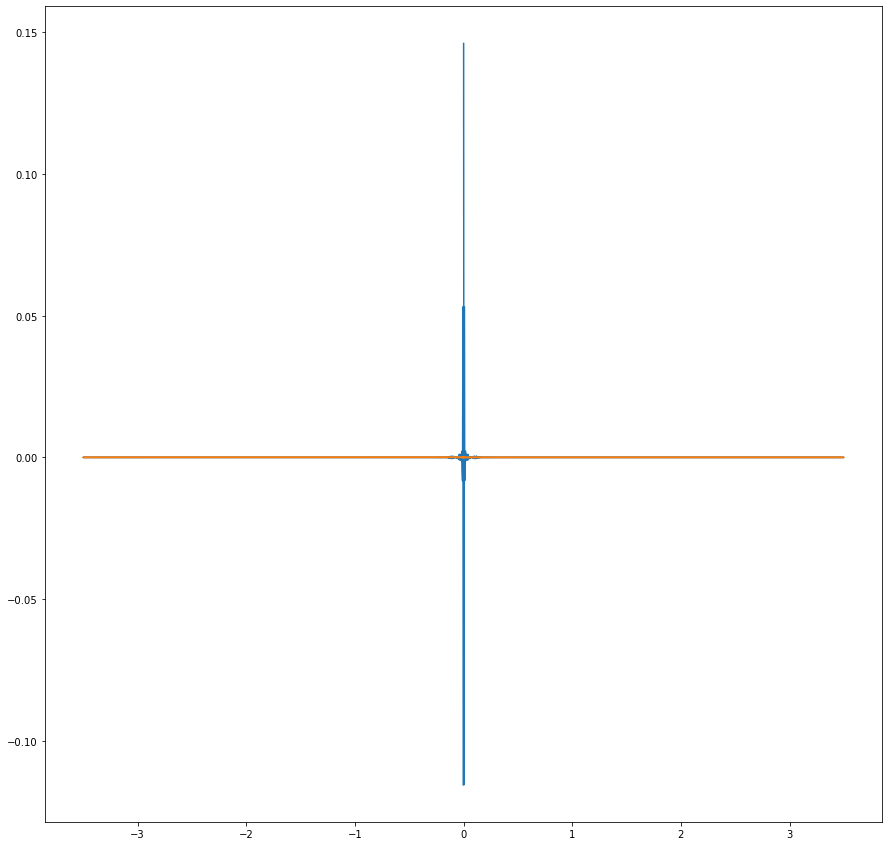

In [29]:
freq = np.fft.fftfreq(len(av_Efield), d = 300/len(av_Efield))
fft = np.fft.fft(av_Efield)
plt.figure(figsize = (15,15))
plt.plot(freq, fft.real, freq, fft.imag)
plt.show()

Let's zoom in :

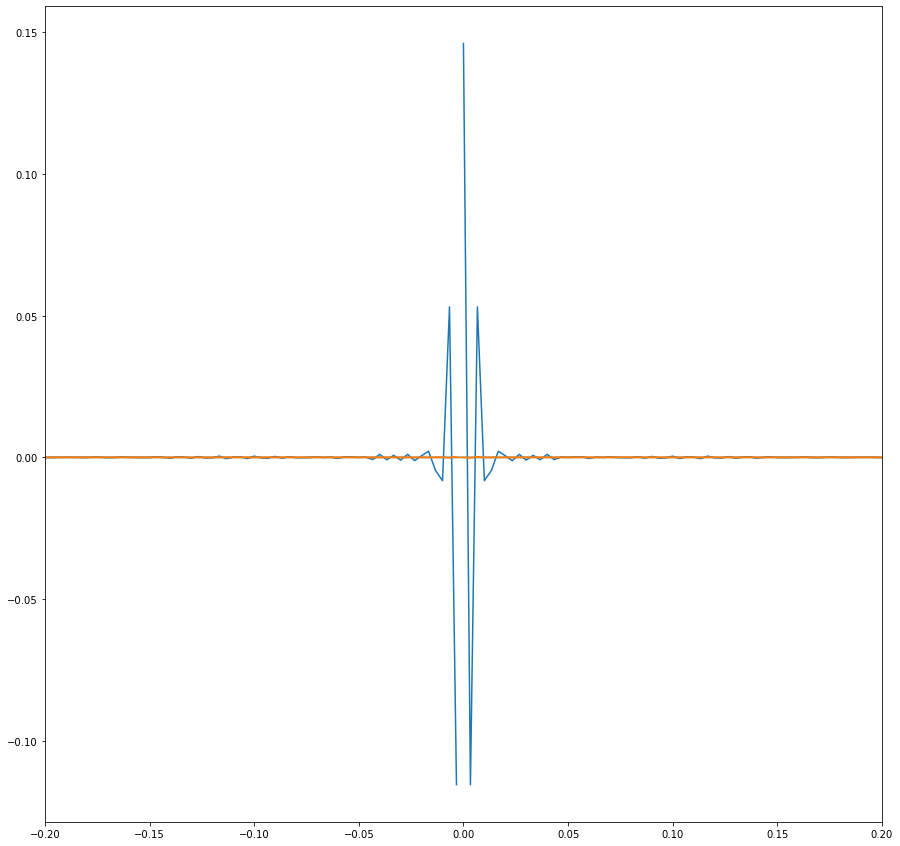

In [30]:
plt.figure(figsize = (15,15))
plt.plot(freq, fft.real, freq, fft.imag)
plt.xlim(-.2,.2)
plt.show()

Because the size of the sample is small compared to the size of the signal, the resolution is terrible. Let's extend the signal with zeros.

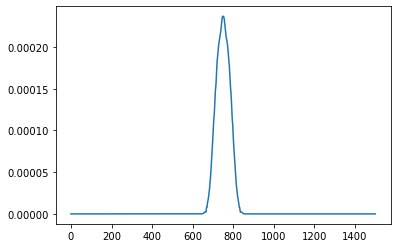

In [31]:
E_extend = np.zeros(len(av_Efield)*5)
E_extend[2*len(av_Efield):3*len(av_Efield)] += av_Efield
new_axis = np.linspace(0,300*5, len(av_Efield)*5)
plt.figure()
plt.plot(new_axis, E_extend)
plt.show()

And look at the FFT :

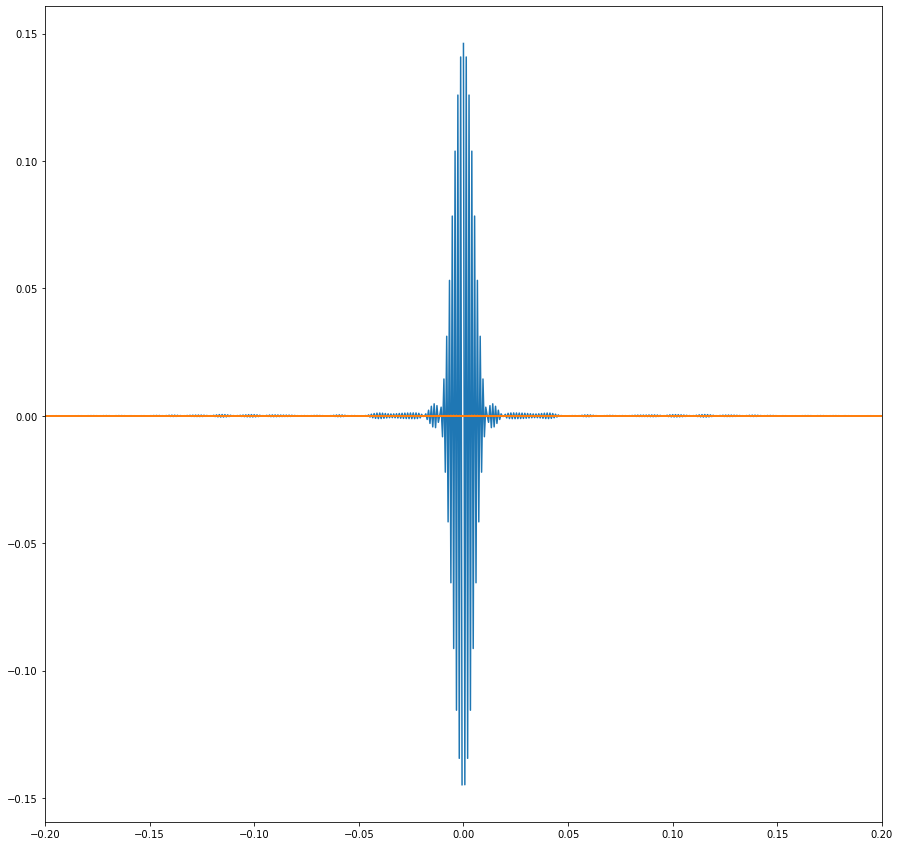

In [32]:
new_freq = np.fft.fftfreq(len(E_extend), d = 300*5/len(E_extend))
new_fft = np.fft.fft(E_extend)
plt.figure(figsize = (15,15))
plt.plot(new_freq, new_fft.real, new_freq, new_fft.imag)
plt.xlim(-.2,.2)
plt.show()

It does look much better, now let's look at the same plot with the normalized FFT absolute value in dB:

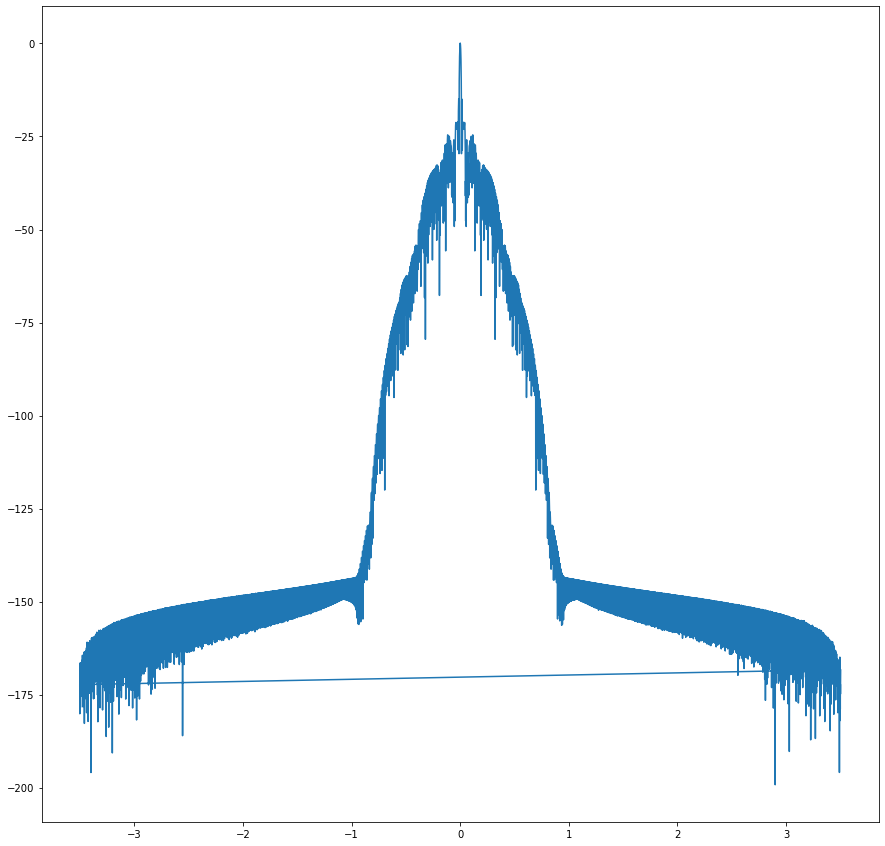

In [33]:
fft_dB = 10*np.log10(np.abs(new_fft.real/np.max(new_fft.real)))
plt.figure(figsize = (15,15))
plt.plot(new_freq, fft_dB)
plt.show()

Let's get the x axis in degrees (by dividing by sample spacing and multiplying by 360) and ignore everything under -100 dB attenuation.

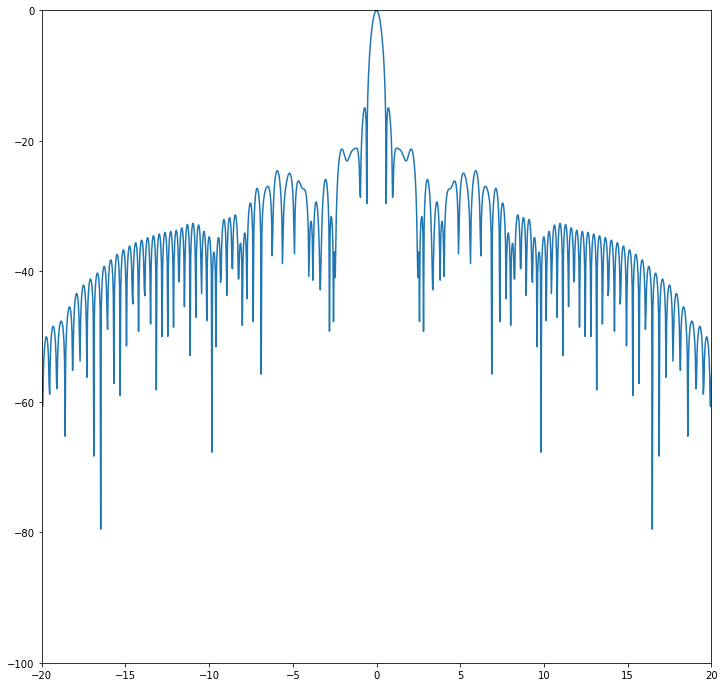

In [34]:
degrees = new_freq*360*300*5/len(E_extend)
plt.figure(figsize = (12,12))
plt.plot(degrees, fft_dB)
plt.xlim((-20,20))
plt.ylim((-100, 0))
plt.show()

We can check the FWHM that we know is supposed to be $\frac{\lambda}{D} \cdot \frac{180}{\pi} = 0.573°$ 

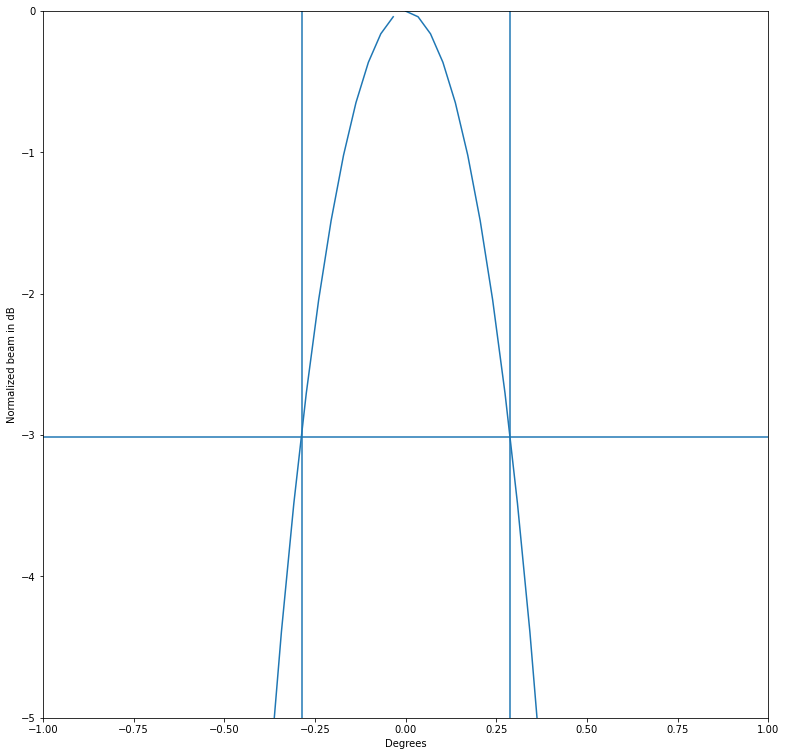

In [35]:
plt.figure(figsize = (13,13))
plt.plot(degrees, fft_dB)
plt.hlines(10*np.log10(.5), -1, 1)
plt.vlines([-0.573/2, 0.573/2], -5, 0)
plt.xlim((-1,1))
plt.ylim((-5, 0))
plt.xlabel('Degrees')
plt.ylabel('Normalized beam in dB')
plt.show()

Now let's test this with the analysis class provided in the code.

-----------
Initializing structure...
read in 5615x2115x1 epsilon-input-file "epsilon_map.h5:eps"
time for choose_chunkdivision = 0.00089407 s
Working in 2D dimensions.
Computational cell is 802 x 302 x 0 with resolution 7
     block, center = (-350,125.5,0)
          size (5,51,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.21,1.21,1.21)
     block, center = (-350,-125.5,0)
          size (5,51,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.21,1.21,1.21)
     block, center = (364.704,0,0)
          size (2,300,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1.21,1.21,1.21)
subpixel-averaging is 65.8254% done, 2.07693 s remaining
subpixel-averaging is 65.8509% done, 2.07453 s remaining
subpixel-averaging is 65.8254% done, 2.0768 s remaining
time for set_epsilon = 18.4693 s
time for set_conductivity = 0.727725 s
time for set_conductivity = 0.730

Meep progress: 171.0/800.0 = 21.4% done in 239.1s, 879.4s to go
on time step 2395 (time=171.071), 0.103443 s/step
Meep progress: 173.78571428571428/800.0 = 21.7% done in 243.1s, 875.9s to go
on time step 2434 (time=173.857), 0.102854 s/step
Meep progress: 176.57142857142856/800.0 = 22.1% done in 247.1s, 872.4s to go
on time step 2473 (time=176.643), 0.10297 s/step
Meep progress: 179.35714285714286/800.0 = 22.4% done in 251.1s, 868.9s to go
on time step 2512 (time=179.429), 0.103058 s/step
Meep progress: 182.14285714285714/800.0 = 22.8% done in 255.2s, 865.5s to go
on time step 2551 (time=182.214), 0.103752 s/step
Meep progress: 184.92857142857142/800.0 = 23.1% done in 259.2s, 862.1s to go
on time step 2590 (time=185), 0.103738 s/step
Meep progress: 187.7142857142857/800.0 = 23.5% done in 263.2s, 858.7s to go
on time step 2629 (time=187.786), 0.103763 s/step
Meep progress: 190.5/800.0 = 23.8% done in 267.3s, 855.2s to go
on time step 2668 (time=190.571), 0.103751 s/step
Meep progress: 1

Meep progress: 352.57142857142856/800.0 = 44.1% done in 506.5s, 642.8s to go
on time step 4937 (time=352.643), 0.10692 s/step
Meep progress: 355.2857142857143/800.0 = 44.4% done in 510.6s, 639.1s to go
on time step 4975 (time=355.357), 0.106986 s/step
Meep progress: 358.0/800.0 = 44.8% done in 514.7s, 635.5s to go
on time step 5013 (time=358.071), 0.107389 s/step
Meep progress: 360.7142857142857/800.0 = 45.1% done in 518.8s, 631.8s to go
on time step 5051 (time=360.786), 0.107099 s/step
Meep progress: 363.4285714285714/800.0 = 45.4% done in 522.8s, 628.1s to go
on time step 5089 (time=363.5), 0.107139 s/step
Meep progress: 366.1428571428571/800.0 = 45.8% done in 526.9s, 624.4s to go
on time step 5127 (time=366.214), 0.107183 s/step
Meep progress: 368.85714285714283/800.0 = 46.1% done in 531.0s, 620.7s to go
on time step 5165 (time=368.929), 0.107805 s/step
Meep progress: 371.57142857142856/800.0 = 46.4% done in 535.1s, 617.0s to go
on time step 5203 (time=371.643), 0.10741 s/step
Meep 

Meep progress: 531.6428571428571/800.0 = 66.5% done in 778.2s, 392.8s to go
on time step 7443 (time=531.643), 0.110307 s/step
Meep progress: 534.2857142857142/800.0 = 66.8% done in 782.3s, 389.1s to go
on time step 7480 (time=534.286), 0.110272 s/step
Meep progress: 536.9285714285714/800.0 = 67.1% done in 786.4s, 385.3s to go
on time step 7517 (time=536.929), 0.110417 s/step
Meep progress: 539.5714285714286/800.0 = 67.4% done in 790.5s, 381.5s to go
on time step 7554 (time=539.571), 0.110321 s/step
Meep progress: 542.2142857142857/800.0 = 67.8% done in 794.6s, 377.8s to go
on time step 7591 (time=542.214), 0.110387 s/step
Meep progress: 544.8571428571428/800.0 = 68.1% done in 798.6s, 374.0s to go
on time step 7628 (time=544.857), 0.110371 s/step
Meep progress: 547.5/800.0 = 68.4% done in 802.7s, 370.2s to go
on time step 7665 (time=547.5), 0.110534 s/step
Meep progress: 550.1428571428571/800.0 = 68.8% done in 806.8s, 366.4s to go
on time step 7702 (time=550.143), 0.110602 s/step
Meep p

Meep progress: 707.0714285714286/800.0 = 88.4% done in 1050.2s, 138.0s to go
on time step 9899 (time=707.071), 0.105207 s/step
Meep progress: 709.8571428571428/800.0 = 88.7% done in 1054.3s, 133.9s to go
on time step 9938 (time=709.857), 0.105228 s/step
Meep progress: 712.6428571428571/800.0 = 89.1% done in 1058.4s, 129.7s to go
on time step 9977 (time=712.643), 0.104457 s/step
Meep progress: 715.4285714285714/800.0 = 89.4% done in 1062.5s, 125.6s to go
on time step 10016 (time=715.429), 0.104172 s/step
Meep progress: 718.2142857142857/800.0 = 89.8% done in 1066.5s, 121.4s to go
on time step 10055 (time=718.214), 0.104202 s/step
Meep progress: 721.0/800.0 = 90.1% done in 1070.6s, 117.3s to go
on time step 10094 (time=721), 0.104169 s/step
Meep progress: 723.7857142857142/800.0 = 90.5% done in 1074.7s, 113.2s to go
on time step 10133 (time=723.786), 0.104218 s/step
Meep progress: 726.5714285714286/800.0 = 90.8% done in 1078.7s, 109.0s to go
on time step 10172 (time=726.571), 0.104155 s/

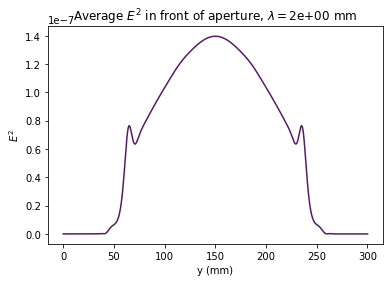

In [13]:
opt_sys = system_assembly(lens1, lens2, aperture_stop, image_plane, res = 7, dpml = 1)
sim = Sim(opt_sys)
analysis = Analysis(sim)
analysis.image_plane_beams(wavelength = 2, wvl_width = 0.1, sourcetype='Gaussian beam multichromatic',
                                y_max = 100, Nb_sources = 1, sim_resolution = 7)

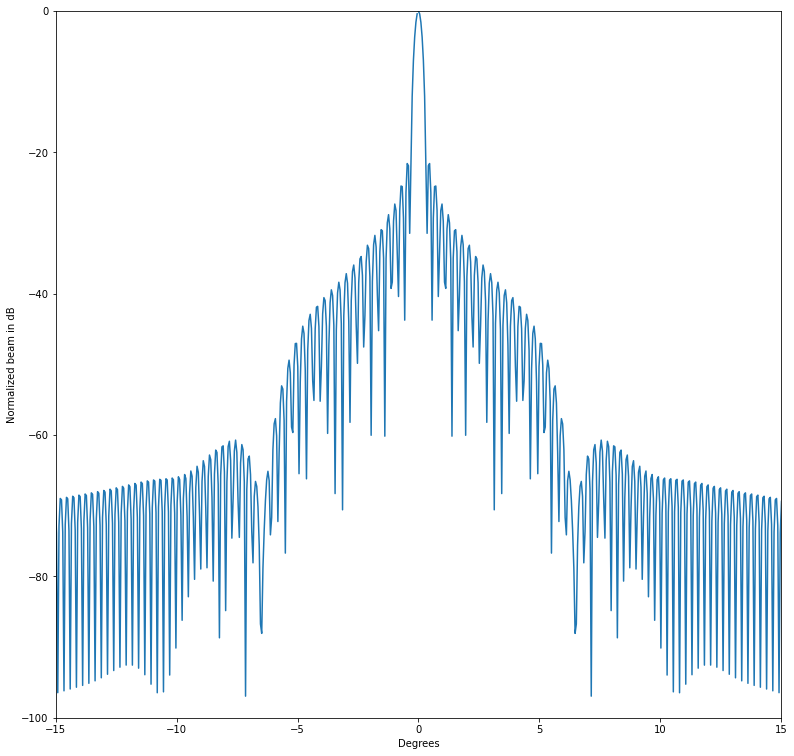

In [15]:
freq, fft = analysis.beam_FT(aperture_size = 200, precision_factor =5)
res = 1
degrees = freq*360/(1/res)
fft_dB = 10*np.log10(fft[0].real**2)
plt.figure(figsize = (13,13))
plt.plot(degrees, fft_dB)
plt.ylim((-100, 0))
plt.xlim((-15,15))
plt.xlabel('Degrees')
plt.ylabel('Normalized beam in dB')
plt.show()